<a href="https://colab.research.google.com/github/Rkankam24/FreeCodeCampCerti/blob/main/SeaLevel_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/a-mt/fcc-sea-level-predictor/refs/heads/master/epa-sea-level.csv

--2025-09-28 13:39:22--  https://raw.githubusercontent.com/a-mt/fcc-sea-level-predictor/refs/heads/master/epa-sea-level.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5912 (5.8K) [text/plain]
Saving to: ‘epa-sea-level.csv.1’

epa-sea-level.csv.1 100%[===================>]   5.77K  --.-KB/s    in 0.002s  

2025-09-28 13:39:22 (3.39 MB/s) - ‘epa-sea-level.csv.1’ saved [5912/5912]



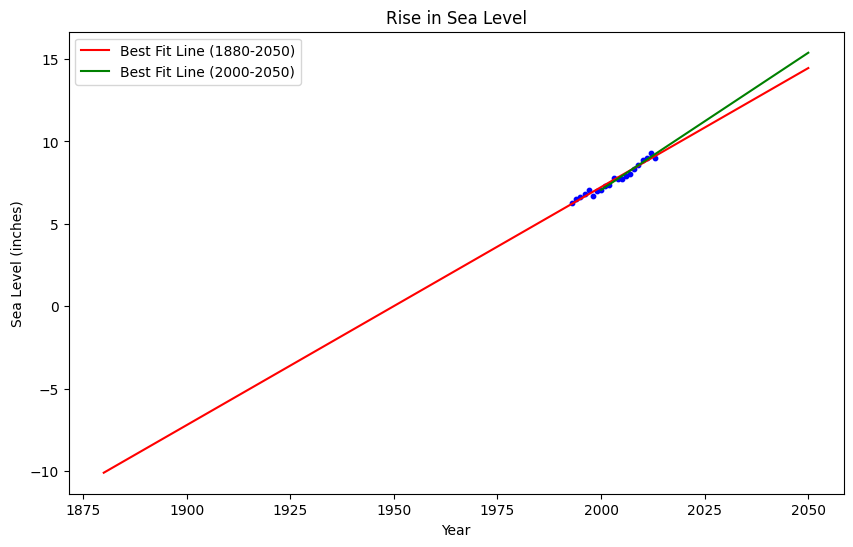

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

def draw_plot():
    # Read data and set the Year column as index
    df = pd.read_csv('epa-sea-level.csv')
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df = df.dropna()

    # Create scatter plot using the 'Year' column as the x-axis and the 'CSIRO Adjusted Sea Level' as the y-axis
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', s=10)

    # Perform linear regression on the entire dataset
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    years_extended = range(1880, 2051)
    line = slope * pd.Series(years_extended) + intercept
    ax.plot(years_extended, line, 'r-', label='Best Fit Line (1880-2050)')

    # Perform linear regression from 2000 onwards
    df_recent = df[df['Year'] >= 2000]
    slope_recent, intercept_recent, r_value_recent, p_value_recent, std_err_recent = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    years_recent = range(2000, 2051)
    line_recent = slope_recent * pd.Series(years_recent) + intercept_recent
    ax.plot(years_recent, line_recent, 'green', label='Best Fit Line (2000-2050)')

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    ax.legend()

    # Save and return figure
    fig.savefig('sea_level_plot.png')
    return fig

# Run the function to test (optional)
if __name__ == '__main__':
    fig = draw_plot()
    plt.show()